In [49]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import warnings
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings("ignore")
torch.set_printoptions(precision=20, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)


In [50]:
x_train = torch.tensor([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], dtype=torch.float, requires_grad=True)
x_train=x_train.reshape(-1,1)
y_train_DrParand= torch.tensor([[0.000000000000,0.165571725847,0.650024370165,1.396808231342,2.305746419194,3.283273666139,4.279620923737,5.279238812489,6.279213433045]], dtype=torch.float,requires_grad=True)

y_train=y_train_DrParand
y_train=y_train.reshape(-1,1)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=3, shuffle=True,drop_last=True)

In [51]:
class CustomActivationLayer(nn.Module):
    def __init__(self, input_size, output_size,L):
        super(CustomActivationLayer, self).__init__()
        self.L=L

        # Ensure the output size matches the number of custom functions
        assert output_size == 9, "This example requires exactly 3 output nodes."

    def forward(self, x):
        # Get the linear output
        linear_out = x
        L=self.L
        activated_out = torch.stack([
            linear_out[:,0]*0+1.0,
            (linear_out[:,1]-L)/(linear_out[:,1]+L),
            1.5*((linear_out[:,2]-L)/(linear_out[:,2]+L))**2-1.5,
            2.5*((linear_out[:,3]-L)/(linear_out[:,3]+L))**3-1.5*((linear_out[:,3]-L)/(linear_out[:,3]+L)),
            4.375*((linear_out[:,4]-L)/(linear_out[:,4]+L))**4-3.75*((linear_out[:,4]-L)/(linear_out[:,4]+L))**2+0.375,
            7.875*((linear_out[:,5]-L)/(linear_out[:,5]+L))**5-8.75*((linear_out[:,5]-L)/(linear_out[:,5]+L))**3+1.875**((linear_out[:,5]-L)/(linear_out[:,5]+L)),
            14.4375*((linear_out[:,6]-L)/(linear_out[:,6]+L))**6-19.6875*((linear_out[:,6]-L)/(linear_out[:,6]+L))**4 +6.5625*((linear_out[:,6]-L)/(linear_out[:,6]+L))**2 - 0.3125,
            26.8125*((linear_out[:,7]-L)/(linear_out[:,7]+L))**7-43.3125*((linear_out[:,7]-L)/(linear_out[:,7]+L))**5 +19.6875*((linear_out[:,7]-L)/(linear_out[:,7]+L))**3 -2.1875*((linear_out[:,7]-L)/(linear_out[:,7]+L)),
            50.2734375*((linear_out[:,8]-L)/(linear_out[:,8]+L))**8-93.84375*((linear_out[:,8]-L)/(linear_out[:,8]+L))**6+54.140625*((linear_out[:,8]-L)/(linear_out[:,8]+L))**4-9.84375*((linear_out[:,8]-L)/(linear_out[:,8]+L))**2 +0.2734375,
            #94.9609375*((linear_out[:,9]-L)/(linear_out[:,9]+L))**9-201.09375*((linear_out[:,9]-L)/(linear_out[:,9]+L))**7+140.765625*((linear_out[:,9]-L)/(linear_out[:,9]+L))**5-36.09375*((linear_out[:,9]-L)/(linear_out[:,9]+L))**3+2.4609375*((linear_out[:,9]-L)/(linear_out[:,9]+L)),
            #180.42578125*((linear_out[:,10]-L)/(linear_out[:,10]+L))**10-427.32421875*((linear_out[:,10]-L)/(linear_out[:,10]+L))**8+351.9140625*((linear_out[:,10]-L)/(linear_out[:,10]+L))**6-117.3046875*((linear_out[:,10]-L)/(linear_out[:,10]+L))**4+13.53515625*((linear_out[:,10]-L)/(linear_out[:,10]+L))**2-0.2460937500000
        ], dim=1)
        return activated_out


In [52]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 9, bias=False)
        self.a1 = nn.Tanh()
        self.l2 = nn.Linear(9, 9, bias=False)
        self.a2 = nn.Tanh()
        self.a3 = CustomActivationLayer(9, 9, 2.0)
        self.l3 = nn.Linear(9, 1, bias=False)

    def forward(self, x):
        x=self.l1(x)
        x=self.a1(x)
        x=self.l2(x)
        x=self.a2(x)
        x=self.a3(x)
        x=self.l3(x)
        return x+1.0
model=MyModule()



In [53]:
num_epochs=20000
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    mysum=0.0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
        optimizer.step()
        optimizer.zero_grad()
        mysum=mysum+loss.item()
    if epoch % 1000 ==0:
        print(f'Epoch {epoch}  Loss {mysum/y_train.shape[0]:.20f}')
    if mysum/y_train.shape[0]< 0.0005:
        break


Epoch 0  Loss 2712.66655815972217169474
Epoch 1000  Loss 0.21270329753557840058
Epoch 2000  Loss 0.04233723175194528676
Epoch 3000  Loss 0.07236784613794750021
Epoch 4000  Loss 0.07107575651672151662
Epoch 5000  Loss 0.09654292774697144364
Epoch 6000  Loss 0.04409087200959523750
Epoch 7000  Loss 0.17033762919406095215
Epoch 8000  Loss 0.05159736528164810682
Epoch 9000  Loss 0.01504682666725582624
Epoch 10000  Loss 0.02381299560268719875
Epoch 11000  Loss 0.01343442178848716986
Epoch 12000  Loss 0.02904755166835255170
Epoch 13000  Loss 0.03097505939917431783
Epoch 14000  Loss 0.07860753022962146952
Epoch 15000  Loss 0.07531202708681423996
Epoch 16000  Loss 0.14321439133750069050
Epoch 17000  Loss 0.06244022233618630457
Epoch 18000  Loss 0.04770495825343661761
Epoch 19000  Loss 0.04560981856452094030


Mean Absolute Error 0.2648076117038727


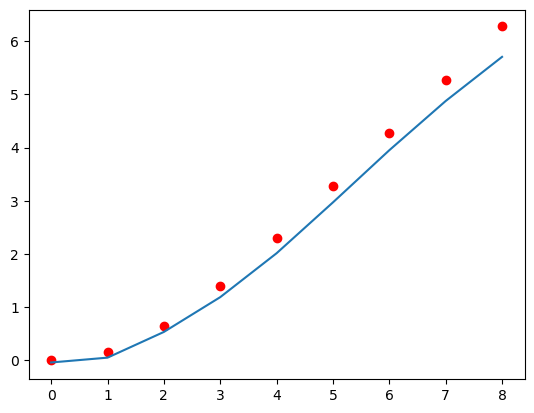

In [54]:
y_pred = model(x_train)
MAE=torch.abs(y_train-y_pred).mean()
print('Mean Absolute Error',MAE.item())
y_pred = y_pred.detach().numpy()
plt.plot(x_train.detach().numpy(), y_pred)
plt.scatter(x_train.detach().numpy(),y_train.detach().numpy(),c='red')
plt.show()


In [55]:
x=torch.linspace(0,10,100,requires_grad=True)
x=x.reshape(-1,1)

In [56]:
model=MyModule()


In [57]:
def dy_dx(y, x):
    return torch.autograd.grad(
        y, x, grad_outputs=torch.ones_like(y), create_graph=True,allow_unused=True
    )[0]


In [58]:
optimizer = torch.optim.Adam(model.parameters(), lr=.01)


In [62]:
losses=[]
n_epochs=20000

for i in range(n_epochs):
    y=model(x)
    y_p = dy_dx(y, x)
    y_pp = dy_dx(y_p, x)
    y_ppp = dy_dx(y_pp, x)

    residential = y_ppp+0.5*y*y_pp
    initial1 = y[0] - 0
    initial2 = y_p[0] - 0
    initial3 = y_p[-1]-.99

    loss = 10*initial3**2+1000*(residential**2).mean() + initial1**2 + initial2**2
    if loss.item() < 0.010:
        break

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.detach().numpy())

    if i % 1000 == 0:
        print('Epoch=',i,' ,Loss=',loss.detach().numpy()[0])



Epoch= 0  ,Loss= 12.751281
Epoch= 1000  ,Loss= 11.318814
Epoch= 2000  ,Loss= 10.398304
Epoch= 3000  ,Loss= 9.985626
Epoch= 4000  ,Loss= 9.863499
Epoch= 5000  ,Loss= 9.833488
Epoch= 6000  ,Loss= 9.820895
Epoch= 7000  ,Loss= 9.813649
Epoch= 8000  ,Loss= 9.796843
Epoch= 9000  ,Loss= 5.4932775
Epoch= 10000  ,Loss= 8.120285
Epoch= 11000  ,Loss= 0.11156477
Epoch= 12000  ,Loss= 0.03198232
Epoch= 13000  ,Loss= 0.020248733
Epoch= 14000  ,Loss= 0.100077234
Epoch= 15000  ,Loss= 0.013107701


In [63]:
print(y_p[-1])


tensor([0.98747539520263671875], grad_fn=<SelectBackward0>)


In [64]:
def eval_residual(x):
    y=model(x)
    y_p = dy_dx(y, x)
    y_pp = dy_dx(y_p, x)
    y_ppp = dy_dx(y_pp, x)

    print('y_pp(0)=',y_pp[0].item())
    # modify the equation to match the one you sent
    residential = y_ppp+0.5*y*y_pp
    initial1 = y[0] - 1
    initial2 = y_p[0] - 0
    initial3 = y_p[-1]-.990
    return (residential**2).mean() + initial1 + initial2+ initial3
res=eval_residual(x)
y_pred=model(x)

print('Mean Residual=',res.item())


y_pp(0)= 0.3327368199825287
Mean Residual= -0.9553216099739075


Mean Absolute Error Between Dr Parand results and the presented model: 0.0549532026052475


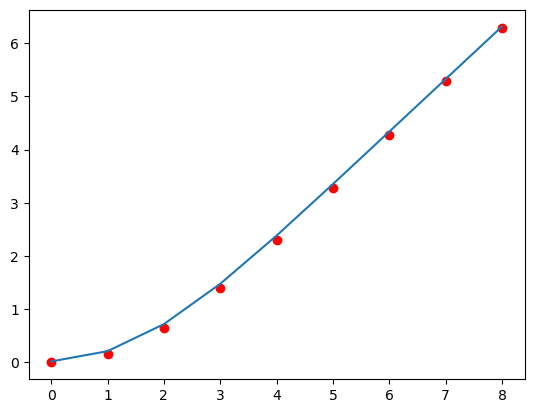

In [65]:
x= torch.tensor([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], dtype=torch.float, requires_grad=True)
x=x.reshape(-1,1)
y_pred = model(x)
MAE=torch.abs(y_train-y_pred).mean()
print('Mean Absolute Error Between Dr Parand results and the presented model:',MAE.item())
y_pred = y_pred.detach().numpy()
plt.plot(x_train.detach().numpy(), y_pred)
plt.scatter(x_train.detach().numpy(),y_train.detach().numpy(),c='red')
plt.show()
